In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/IIM Nagpur NLP Files/CellPhoneAllData (Kapil sir modified for Sentiment Analysis).xlsx')

In [ ]:
df.head()

,Rating,verified,reviewTime,Year,reviewerID,asin,style,reviewerName,reviewText,summary,...,focusfuture,Conversation,dominant_topic,total_imp_topics,custom_topic_name,votes,total_imp_topics_0.05,total_imp_topics_0.10,total_imp_topics_0.20,Neutral_Rating
0,1,False,"09 21, 2004",2004,A5JLAU2ARJ0BO,B0000E3GWH,NaN,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,...,0.00,0.00,6,2,Quality,2,2,2,1,0
1,4,False,"07 24, 2004",2004,A1ACM1CBGORBN1,B0000E3GWH,NaN,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,...,2.20,0.73,6,5,Quality,15,5,3,1,0
2,3,False,"07 6, 2004",2004,A2V48Q03FZUOSD,B0000E3GWH,NaN,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,...,0.00,0.00,6,2,Quality,11,2,2,2,1
3,5,True,"04 12, 2004",2004,A1V3TRGWOMA8LC,B0000E3GWH,NaN,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,...,3.64,0.00,0,5,Phone related generalized words 1,4,5,4,2,0
4,3,False,"02 19, 2004",2004,A3NOBH42C7UI5M,B0000E3GWH,NaN,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,...,0.81,0.00,6,4,Quality,12,4,3,2,1


In [ ]:
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

### Removing stopwords might not be the best idea for this data

In [ ]:
lm = WordNetLemmatizer()
def text_transformation(review):
    corpus = []
    new_item = re.sub('[^a-zA-Z.]',' ',str(review))
    new_item = new_item.lower()
    new_item = new_item.split()
    new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
    corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [ ]:
k = 0
review = df['reviewText'][k]    # run this for original review
#review = text_transformation(df['reviewText'][k])[0]    # run this for transformed/processed review
print(review)

This phone is ugly and heavy and has a terrible user interface even for techies like myself.  It also drops calls like crazy here in Manhattan.  The Moto V600 is a much better phone, takes better pictures, gives you better clarity and reception, is smaller, and is much, much cheaper.  Get the Moto V600 if you want T-Mobile.  Stay away from this ugly monster.


In [ ]:
doc = nlp(review)
# for ent in doc.ents:
#     print(ent.text, " | ", ent.label_)

In [ ]:
# to visualize better 
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

In [ ]:
len(doc.ents)

4

## Named Entity Recognition (NER)

In [ ]:
df['reviewText'] = df['reviewText'].astype(str)

In [ ]:
no_of_entities = [len(nlp(df['reviewText'][i]).ents) for i in list(df.index)]  # this takes 14 mins to run, even here on colab with GPU runtime

In [ ]:
print(no_of_entities)

[4, 14, 15, 4, 32, 23, 25, 3, 22, 32, 16, 7, 21, 6, 6, 48, 6, 11, 3, 16, 27, 6, 19, 4, 3, 22, 7, 24, 0, 54, 2, 2, 5, 7, 11, 37, 6, 10, 26, 8, 8, 6, 16, 27, 16, 31, 5, 23, 11, 16, 9, 3, 5, 16, 27, 45, 10, 17, 51, 13, 4, 6, 4, 17, 23, 8, 24, 0, 10, 1, 8, 39, 33, 60, 18, 26, 96, 1, 0, 3, 4, 6, 3, 7, 9, 13, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 3, 0, 0, 1, 0, 4, 3, 11, 4, 3, 13, 7, 5, 12, 6, 22, 7, 5, 4, 10, 2, 2, 11, 0, 0, 0, 0, 4, 3, 3, 1, 1, 21, 8, 8, 4, 6, 10, 0, 34, 6, 7, 18, 3, 49, 14, 0, 0, 2, 14, 9, 11, 2, 1, 6, 1, 6, 5, 27, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 1, 26, 21, 22, 6, 7, 10, 14, 20, 12, 64, 21, 25, 14, 18, 6, 3, 1, 53, 52, 6, 15, 7, 14, 0, 1, 4, 18, 41, 5, 51, 1, 2, 0, 10, 2, 3, 5, 6, 11, 3, 1, 6, 23, 40, 13, 5, 10, 3, 9, 6, 14, 20, 9, 37, 31, 16, 4, 27, 11, 3, 35, 27, 13, 10, 16, 6, 4, 4, 5, 48, 6, 4, 7, 17, 10, 7, 12, 2, 10, 15, 3, 3, 3, 0, 7, 0, 0, 16, 0, 1, 2, 8, 0, 0, 0, 0, 8, 8, 29, 5, 6, 7, 7,

In [ ]:
len(no_of_entities)

53627

In [ ]:
df['no_of_entities'] = no_of_entities

In [ ]:
df.head()

,Rating,verified,reviewTime,Year,reviewerID,asin,style,reviewerName,reviewText,summary,...,Conversation,dominant_topic,total_imp_topics,custom_topic_name,votes,total_imp_topics_0.05,total_imp_topics_0.10,total_imp_topics_0.20,Neutral_Rating,no_of_entities
0,1,False,"09 21, 2004",2004,A5JLAU2ARJ0BO,B0000E3GWH,NaN,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,...,0.00,6,2,Quality,2,2,2,1,0,4
1,4,False,"07 24, 2004",2004,A1ACM1CBGORBN1,B0000E3GWH,NaN,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,...,0.73,6,5,Quality,15,5,3,1,0,14
2,3,False,"07 6, 2004",2004,A2V48Q03FZUOSD,B0000E3GWH,NaN,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,...,0.00,6,2,Quality,11,2,2,2,1,15
3,5,True,"04 12, 2004",2004,A1V3TRGWOMA8LC,B0000E3GWH,NaN,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,...,0.00,0,5,Phone related generalized words 1,4,5,4,2,0,4
4,3,False,"02 19, 2004",2004,A3NOBH42C7UI5M,B0000E3GWH,NaN,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,...,0.00,6,4,Quality,12,4,3,2,1,32


In [ ]:
df.columns

Index(['Rating', 'verified', 'reviewTime', 'Year', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'vote', 'Image',
       'no_of_sent', 'no_of_words', 'no_of_unique_words', 'rank_no',
       'sub_cat_1', 'sub_cat_rank', 'WC', 'Analytic', 'Authentic', 'Tone',
       'WPS', 'BigWords', 'Dic', 'Cognition', 'Affect', 'tone_pos', 'tone_neg',
       'emotion', 'emo_pos', 'emo_neg', 'time', 'focuspast', 'focuspresent',
       'focusfuture', 'Conversation', 'dominant_topic', 'total_imp_topics',
       'custom_topic_name', 'votes', 'total_imp_topics_0.05',
       'total_imp_topics_0.10', 'total_imp_topics_0.20', 'Neutral_Rating',
       'no_of_entities'],
      dtype='object')

In [ ]:
df['no_of_entities'].value_counts()

0      26668
1       8468
2       3775
3       2507
4       1771
       ...  
240        1
261        1
139        1
168        1
221        1
Name: no_of_entities, Length: 171, dtype: int64

In [ ]:
df['no_of_entities'].nlargest(10)

39829    332
14710    326
49574    324
660      286
22233    267
47835    263
28902    261
47832    260
26303    251
26440    240
Name: no_of_entities, dtype: int64

In [ ]:
g = df.groupby('no_of_entities')

In [ ]:
g.describe()['votes']

,count,mean,std,min,25%,50%,75%,max
no_of_entities,,,,,,,,
0,26668.0,0.211414,1.579247,0.0,0.0,0.0,0.0,85.0
1,8468.0,0.657770,3.384955,0.0,0.0,0.0,0.0,112.0
2,3775.0,1.306225,7.674140,0.0,0.0,0.0,0.0,369.0
3,2507.0,2.246510,9.984498,0.0,0.0,0.0,2.0,259.0
4,1771.0,2.241107,6.318391,0.0,0.0,0.0,2.0,104.0
...,...,...,...,...,...,...,...,...
267,1.0,359.000000,NaN,359.0,359.0,359.0,359.0,359.0
286,1.0,280.000000,NaN,280.0,280.0,280.0,280.0,280.0
324,1.0,88.000000,NaN,88.0,88.0,88.0,88.0,88.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

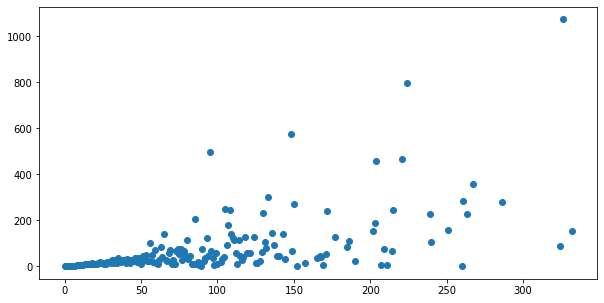

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(list(g.describe()['votes'].index), g.describe()['votes']['mean'])
plt.show()

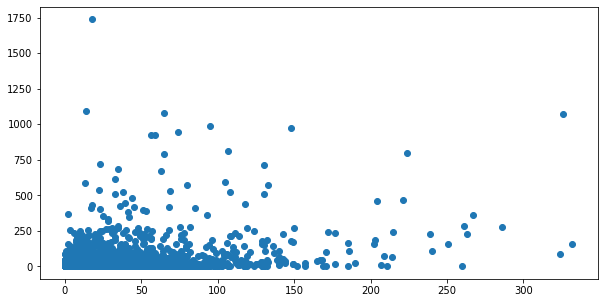

In [ ]:
plt.figure(figsize = (10,5))
plt.scatter(df['no_of_entities'], df['votes'])
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
X = g.describe()['votes'].index
y = g.describe()['votes']['mean'] #.astype(np.float64)

In [ ]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([[1.02436255]])

In [ ]:
regressor.intercept_

array([-20.34600869])

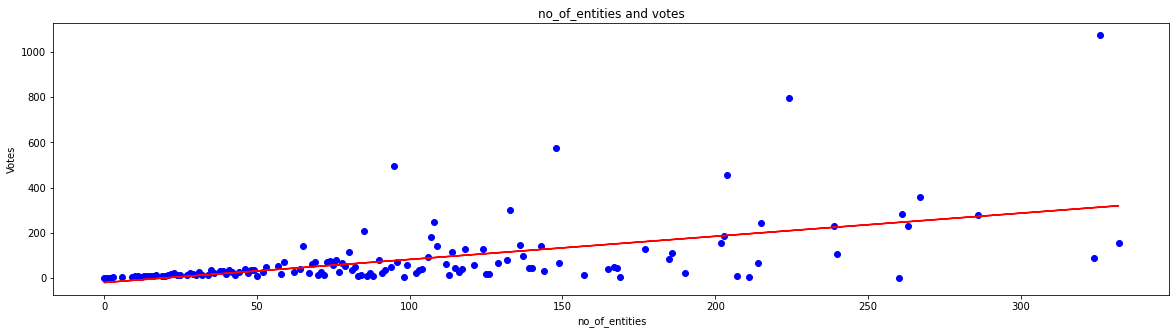

In [ ]:
plt.figure(figsize = (20,5))
plt.scatter(X_train, y_train, color = 'blue')   # plt.scatter(X_train[:100], y_train[:100], color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('no_of_entities and votes')
plt.xlabel('no_of_entities')
plt.ylabel('Votes')
plt.show()

In [ ]:
regressor.score(X_test, y_test)

0.39535483309389563

In [ ]:
# columns = ['Rating', 'verified', 'reviewTime', 'Year', 'reviewerID', 'asin', 'no_of_entities']
# to_match_df = pd.DataFrame(df, columns=columns)
# to_match_df

In [ ]:
# to_match_df.to_excel('to_match_cols.xlsx', index=False)

In [ ]:
import pickle 

pickle_out = open('/content/drive/MyDrive/IIM Nagpur NLP Files/CellPhoneandAccessoriesNER.pickle', 'wb')
pickle.dump(df, pickle_out)
pickle_out.close()

In [ ]:
df.to_pickle('/content/drive/MyDrive/IIM Nagpur NLP Files/CellPhoneandAccessoriesNER.pickle')